In [13]:
import random
from math import exp, sqrt
import numpy as np
%matplotlib inline 
from pylab import mpl, plt
import pandas as pd
import configparser
import quandl as q
import nasdaqdatalink

In [12]:
# pip install quandl


In [3]:
%%time
import random
from math import exp, sqrt

S0 = 100
r = 0.05
T = 1.0
sigma = 0.2

values = []

for _ in range(10000000):
    ST = S0 * exp((r - 0.5*sigma**2)*T + sigma*random.gauss(0,1)* sqrt(T))
    values.append(ST)
    

CPU times: total: 11.4 s
Wall time: 11.4 s


In [4]:
%%time
import numpy as np
S0 = 100
r = 0.05
T = 1.0
sigma = 0.2

values = []


ST = S0 * np.exp((r - 0.5*sigma**2)*T + sigma*np.random.standard_normal(10000000)* np.sqrt(T))


CPU times: total: 453 ms
Wall time: 453 ms


In [5]:
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
c =  configparser.ConfigParser()
c.read('../pyalgo.cfg')


[]

In [15]:
# q.ApiConfig.api_key = c['quandl']['api_key']
d = nasdaqdatalink.get("'BCHAIN/MKPRU'", returns="numpy")
# d = q.get('BCHAIN/MKPRU')
d['SMA'] = d['Value'].rolling(100).mean()
d.loc['2013-1-1'].plot(title='BTC/USD exchange rate', figsize=(10,6))

NotFoundError: (Status 400) (Nasdaq Data Link Error QECx01) We could not recognize the URL you requested: /api/v3/datasets/'BCHAIN/MKPRU'/data. Please check your URL and try again.

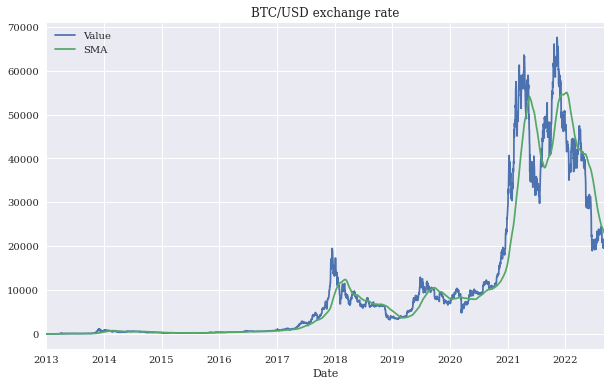

In [19]:
import quandl as q
q.ApiConfig.api_key = '4s1vBjzPAVfxWmBP52zj'
d = q.get('BCHAIN/MKPRU')
d['SMA'] = d['Value'].rolling(100).mean()
d.loc['2013-1-1':].plot(title='BTC/USD exchange rate',
figsize=(10, 6));

In [11]:
# pip install nasdaq-data-link